<a href="https://colab.research.google.com/github/code-adi56/India_energy/blob/main/Energy_Consumption_Forecasting_in_India_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Energy Consumption Forecasting: Predict energy consumption or demand to optimize energy management and planning.



OVERVIEW:-
Electric consumption forecasting is to accurately predict the future electricity usage patterns for a given geographical area, such as a country(INDIA). This involves estimating the amount of electricity that will be consumed by residential, commercial, and industrial sectors over a specific time period, typically ranging from hours to years.
Electric consumption forecasting faces various challenges, including the influence of factors such as weather conditions, economic variables, demographic changes, technological advancements, and social behaviour. Historical consumption data, as well as external data sources that affect electricity demand, such as temperature, population growth, economic indicators, and cultural events.


PROBLEM STATEMENT:-
As the consumption of electricity is increasing year by year due various factors like population growth, access to electricity , production, environmental factor etc their can be rise in demand for electricity and for that enough electricity resource should be present , for this there is a need of forecasting model which could predict the consumption of electricity  based on past data of consumption.




SOLUTION STATEMENT:-
For this we have prepared a “Electricity consumption forecasting SVR model” based on the datasets of energy consumption in India.
This model forecasts the energy consumption per capita based on the years, consumption of energy, access to population and production of energy.
It also forecasts the consumption of electricity based on sources which includes coal consumption, oil consumption, solar consumption, hydro consumption and gas consumption based on years, access to population and electricity production based on sources.
This will help in predicting the consumption of electricity consumption based on source and it will help the country to be prepared for addressing any future increase in electricity consumption demand.


In [ ]:
#Energy consumption and analysis in India
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df= pd.read_csv("energy.csv")
df.head()
df = df.replace(0, np.nan)
from sklearn.impute import SimpleImputer
cols_to_drop = ['Entity', 'Code']
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
#Give the nan values replaced by values

imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

imputed_df.to_csv("multivariate_imputed.csv", index=False)
data = pd.read_csv("multivariate_imputed.csv")
data
#New clean dataset is prepared


,Unnamed: 0,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,...,Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity),Fossil fuels (% electricity),Low-carbon electricity (% electricity),Nuclear (% electricity).1,Renewables (% electricity),Access to electricity (% of population)
0,3.4,1965.0,146.995250,2.372522,413.407682,0.014029,53.241536,3.267903,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
1,1.0,1966.0,164.149813,2.663272,412.415691,0.014029,55.598552,3.267903,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
2,2.0,1967.0,169.360364,3.558783,419.285587,0.014029,62.215381,3.267903,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
3,3.0,1968.0,189.771047,3.954203,433.825064,0.014029,71.803031,3.267903,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
4,4.0,1969.0,227.929016,4.745044,460.841576,0.014029,79.721129,2.013284,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
5,5.0,1970.0,226.891629,6.328471,436.809226,0.014029,84.545645,3.633732,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
6,6.0,1971.0,243.332658,6.706224,442.872556,0.014029,92.733818,2.700747,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
7,7.0,1972.0,262.383467,7.355912,467.683461,0.014029,90.008519,2.565709,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
8,8.0,1973.0,276.959297,7.336662,461.449776,0.014029,95.851952,5.426045,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829
9,9.0,1974.0,271.543178,8.303975,520.856519,0.014029,92.230497,4.996381,0.287630,0.491325,...,0.001041,0.029495,5.475284,2.253782,0.049151,73.442358,26.557642,2.253782,24.303860,51.311829


In [ ]:
#Energy per capita consumption
figure = px.line(data, x='Year', y='Energy consumption per capita (kWh)', markers=True)
figure.update_traces(textposition="bottom right")
figure.show()

In [ ]:
#Per capita Electricity
fig = px.line(data, x='Year', y='Electricity Generation (TWh)', text='Year')
fig.update_traces(textposition="bottom right", line_color='#32CD32')
fig.show()

In [ ]:

#Energy consumption by source
figure = px.line(data.iloc[:,0:10], x='Year', y='Oil Consumption - EJ')
figure.add_scatter(x=data['Year'] ,y=data['Coal Consumption - EJ'],mode='lines+markers', name='Coal')
figure.add_scatter(x=data['Year'] ,y=data['Oil Consumption - EJ'],mode='lines+markers', name='Oil')
figure.add_scatter(x=data['Year'] ,y=data['Gas Consumption - EJ'],mode='lines+markers', name='Gas')
figure.add_scatter(x=data['Year'] ,y=data['Hydro Consumption - EJ'],mode='lines+markers', name='Hydro')
figure.add_scatter(x=data['Year'] ,y=data['Solar Consumption - EJ'],mode='lines+markers', name='Solar')
figure.add_scatter(x=data['Year'] ,y=data['Nuclear Consumption - EJ'],mode='lines+markers', name='Nuclear')
figure.add_scatter(x=data['Year'] ,y=data['Wind Consumption - EJ'],mode='lines+markers', name='Wind')
figure.add_scatter(x=data['Year'] ,y=data['Geo Biomass Other - EJ'],mode='lines+markers', name='Geo Biomass')
figure.add_scatter(x=data['Year'] ,y=data['Biofuels (TWh)'],mode='lines+markers', name='Biofuels')
figure.update_traces(textposition="bottom right")
figure.update_yaxes(title_text='Energy Consumption by Source (TWh)')
figure.show()


In [ ]:
#Energy Consumption per capita

target = "Energy consumption per capita (kWh)"
X = data.drop(target, axis=1)
X = X.iloc[:,1:-1]
y = data[target]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y_pred = regressor.predict(X_test)
print(X_test , Y_pred)


[[ 2.51976315e-01 -6.16151042e-02 -2.54535685e-02 -9.96005188e-02
  -2.93470705e-01 -6.72472250e-02 -2.81843462e-01 -4.80117380e-01
  -5.14803386e-01 -4.08344669e-01 -5.60971471e-01 -4.59429858e-01
   8.84501501e-01 -1.41386605e-01 -1.29572425e-01  1.10876088e-01
  -3.32069961e-01 -4.79413088e-01 -2.95796507e-01  1.68353223e+00
  -4.83130391e-01 -4.12871542e-01  1.08909945e+00  9.94363942e-01
  -9.94363942e-01 -1.11563075e-01 -1.59517243e-02 -9.53819939e-02
   6.16014847e-01  6.93905703e-01 -7.35396975e-01 -3.10237526e-01
  -4.93240224e-01  4.64220438e-01 -1.09047275e+00 -4.17229404e-01
   1.60917664e+00 -1.60917664e+00 -1.09047275e+00 -1.35941235e+00]
 [-1.38586973e+00 -1.02317882e+00 -9.70992476e-01 -9.71859483e-01
  -2.93606357e-01 -1.24813225e+00 -9.03148708e-01 -5.34059456e-01
  -5.88458477e-01 -4.08344669e-01 -5.60971471e-01 -3.03019766e+00
  -1.23965906e+00 -7.79193438e-01 -7.61685145e-01 -8.81382034e-01
  -8.15593733e-01 -5.61900273e-01 -2.95917661e-01  4.38798869e-01
  -5.3098

In [ ]:
# Calculate the R-squared score
r2 = r2_score(y_test, Y_pred)
print("R-squared score:", r2)

R-squared score: 0.9756215493950774


In [ ]:
#Coal consumption forecassting

selected_columns = ['Year', 'Coal Consumption - EJ', 'Electricity from coal (TWh)','Coal (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = data.columns.difference(selected_columns)

df1= data.drop(columns=columns_to_delete)
print(df1)

      Year  Coal Consumption - EJ  Electricity from coal (TWh)  \
0   1965.0             413.407682                    149.67840   
1   1966.0             412.415691                    149.67840   
2   1967.0             419.285587                    149.67840   
3   1968.0             433.825064                    149.67840   
4   1969.0             460.841576                    149.67840   
5   1970.0             436.809226                    149.67840   
6   1971.0             442.872556                    149.67840   
7   1972.0             467.683461                    149.67840   
8   1973.0             461.449776                    149.67840   
9   1974.0             520.856519                    149.67840   
10  1975.0             559.906650                    149.67840   
11  1976.0             583.035299                    149.67840   
12  1977.0             610.346656                    149.67840   
13  1978.0             590.664585                    149.67840   
14  1979.0

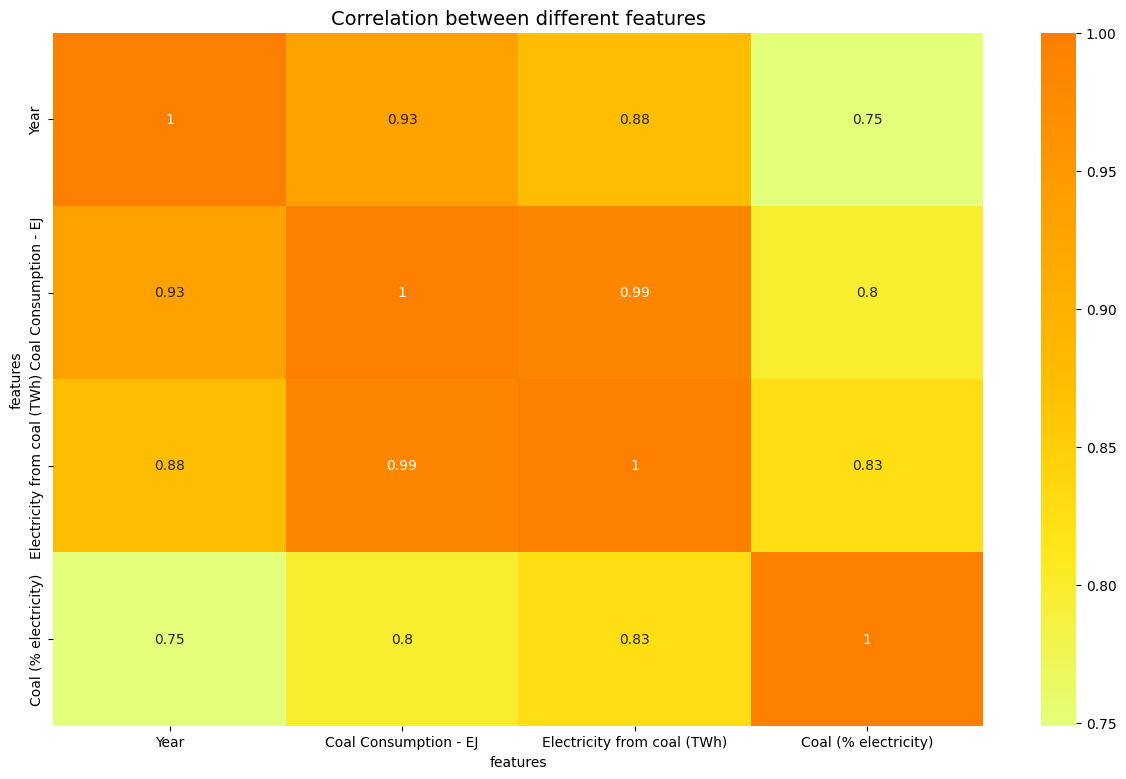

In [ ]:
X1 = df1.drop('Coal Consumption - EJ',axis=1)
y1= df1['Coal Consumption - EJ']
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df1.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X1= StandardScaler()
sc_y1 = StandardScaler()

X1 = sc_X1.fit_transform(X1)
y1 = sc_y1.fit_transform(y1.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)



In [ ]:
#SVR regression is used for prediction of coal consumption in India as energy source.
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X1_train, y1_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y1_pred = regressor.predict(X1_test)
print(y1_test , Y1_pred)
# Calculate the R-squared score for accuracy
r2 = r2_score(y1_test, Y1_pred)
print("R-squared score:", r2)

[[-0.09960052]
 [-0.97185948]
 [-0.04519929]
 [-0.86377826]
 [-0.70385951]
 [ 1.88749098]
 [ 0.51292809]
 [-0.32482108]
 [ 0.83950825]
 [-0.84995188]
 [ 2.12776393]] [-0.05959317 -0.92333373 -0.03279241 -0.85734895 -0.70903544  1.9562028
  0.5700956  -0.42569595  0.77782908 -0.87470027  2.1382951 ]
R-squared score: 0.9977376014189926


      Year  Oil Consumption - EJ  Electricity from oil (TWh)  \
0   1965.0            146.995250                   12.172200   
1   1966.0            164.149813                   12.172200   
2   1967.0            169.360364                   12.172200   
3   1968.0            189.771047                   12.172200   
4   1969.0            227.929016                   12.172200   
5   1970.0            226.891629                   12.172200   
6   1971.0            243.332658                   12.172200   
7   1972.0            262.383467                   12.172200   
8   1973.0            276.959297                   12.172200   
9   1974.0            271.543178                   12.172200   
10  1975.0            278.093057                   12.172200   
11  1976.0            293.258928                   12.172200   
12  1977.0            315.044288                   12.172200   
13  1978.0            342.374790                   12.172200   
14  1979.0            369.473051        

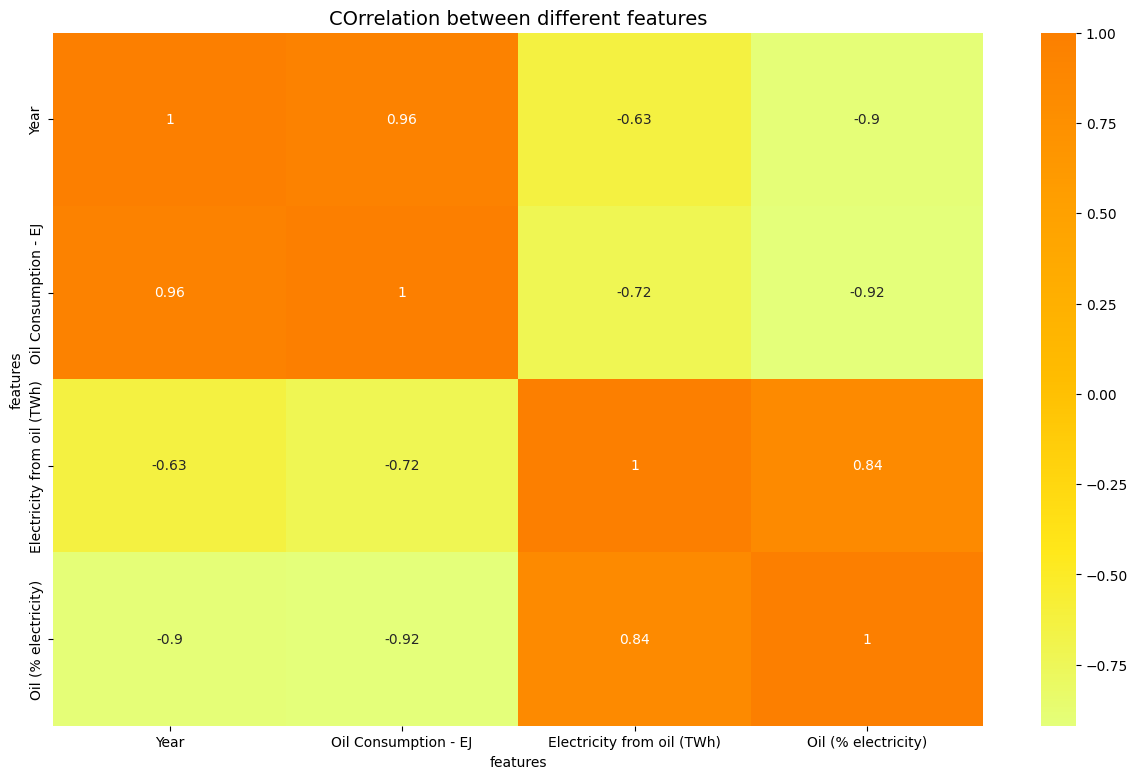

In [ ]:
#Prediction of Consumption oil in India

selected_columns = ['Year', 'Oil Consumption - EJ', 'Electricity from oil (TWh)','Oil (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = data.columns.difference(selected_columns)

df2= data.drop(columns=columns_to_delete)
print(df2)

X2= df2.drop('Oil Consumption - EJ',axis=1)
y2= df2['Oil Consumption - EJ']
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df2.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X2= StandardScaler()
sc_y2 = StandardScaler()

X2 = sc_X2.fit_transform(X2)
y2 = sc_y2.fit_transform(y2.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [ ]:
#SVR regression is used for prediction of oil consumption in India as energy source.
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X2_train, y2_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y2_pred = regressor.predict(X2_test)
print(y2_test , Y2_pred)
# Calculate the R-squared score for accuracy
r2 = r2_score(y2_test, Y2_pred)
print("R-squared score:", r2)

[[-0.0616151 ]
 [-1.02317882]
 [ 0.02524267]
 [-0.87358707]
 [-0.69911223]
 [ 1.46031717]
 [ 0.67568188]
 [-0.4041201 ]
 [ 0.92920381]
 [-0.90898978]
 [ 2.09648073]] [-0.00836922 -0.98762119  0.04069595 -0.82648191 -0.63248553  1.55002873
  0.87432482 -0.34163949  0.83703073 -0.85416336  1.82434647]
R-squared score: 0.9865559188015876


      Year  Gas Consumption - EJ  Electricity from gas (TWh)  \
0   1965.0              2.372522                    4.190800   
1   1966.0              2.663272                    4.190800   
2   1967.0              3.558783                    4.190800   
3   1968.0              3.954203                    4.190800   
4   1969.0              4.745044                    4.190800   
5   1970.0              6.328471                    4.190800   
6   1971.0              6.706224                    4.190800   
7   1972.0              7.355912                    4.190800   
8   1973.0              7.336662                    4.190800   
9   1974.0              8.303975                    4.190800   
10  1975.0             10.630821                    4.190800   
11  1976.0             12.914354                    4.190800   
12  1977.0             13.792636                    4.190800   
13  1978.0             15.404825                    4.190800   
14  1979.0             19.158578        

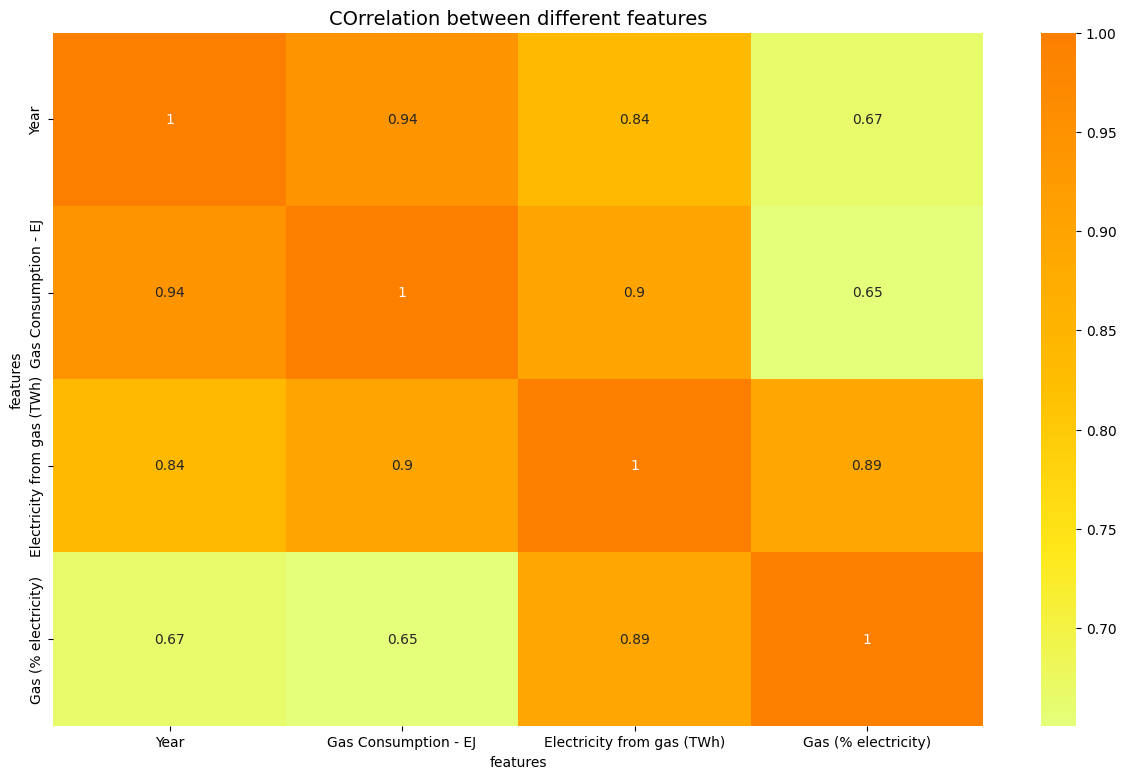

In [ ]:
#Forecasting of gas consumption in India
selected_columns = ['Year', 'Gas Consumption - EJ', 'Electricity from gas (TWh)','Gas (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = data.columns.difference(selected_columns)

df3= data.drop(columns=columns_to_delete)
print(df3)

X3= df3.drop('Gas Consumption - EJ',axis=1)
y3= df3['Gas Consumption - EJ']
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df3.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X3= StandardScaler()
sc_y3 = StandardScaler()

X3 = sc_X3.fit_transform(X3)
y3= sc_y3.fit_transform(y3.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X3_train, y3_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y3_pred = regressor.predict(X3_test)
print(y3_test , Y3_pred)
# Calculate the R-squared score for accuracy
r2 = r2_score(y3_test, Y3_pred)
print("R-squared score:", r2)

[[-0.02545357]
 [-0.97099248]
 [ 0.05974458]
 [-0.92605769]
 [-0.82736048]
 [ 1.39887158]
 [ 0.77386923]
 [-0.36314074]
 [ 0.97736903]
 [-0.93403924]
 [ 1.65799312]] [ 0.04699384 -0.9406996   0.09125779 -0.90086611 -0.74818525  1.46649072
  0.85811956 -0.37368356  1.19428519 -0.91642896  1.68724863]
R-squared score: 0.9923584306408673


      Year  Hydro Consumption - EJ  Electricity from hydro (TWh)  \
0   1965.0               53.241536                     54.265813   
1   1966.0               55.598552                     54.265813   
2   1967.0               62.215381                     54.265813   
3   1968.0               71.803031                     54.265813   
4   1969.0               79.721129                     54.265813   
5   1970.0               84.545645                     54.265813   
6   1971.0               92.733818                     54.265813   
7   1972.0               90.008519                     54.265813   
8   1973.0               95.851952                     54.265813   
9   1974.0               92.230497                     54.265813   
10  1975.0              110.190461                     54.265813   
11  1976.0              115.272776                     54.265813   
12  1977.0              125.768859                     54.265813   
13  1978.0              156.041773              

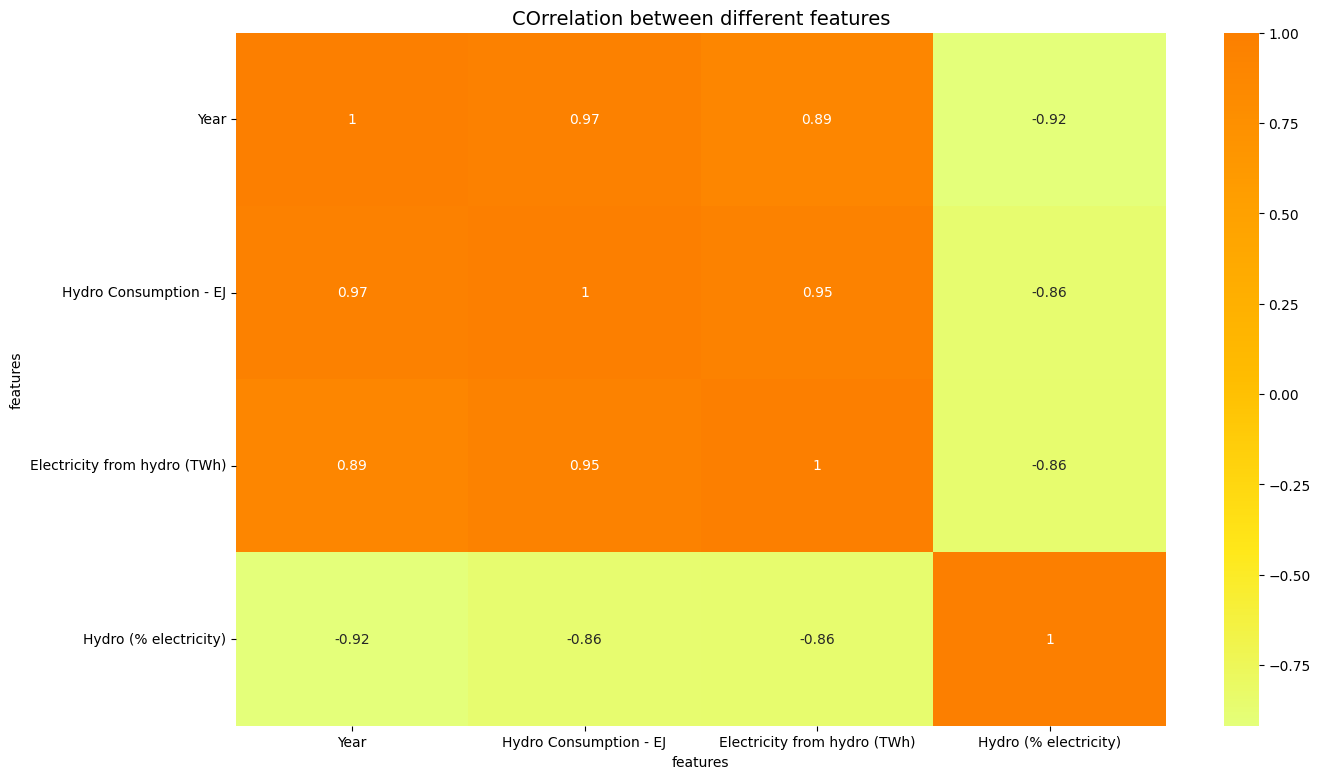

In [ ]:
#Forecasting Hydro power consumption
#Forecasting of gas consumption in India
selected_columns = ['Year', 'Hydro Consumption - EJ', 'Electricity from hydro (TWh)','Hydro (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = data.columns.difference(selected_columns)

df4= data.drop(columns=columns_to_delete)
print(df4)

X4= df4.drop('Hydro Consumption - EJ',axis=1)
y4= df4['Hydro Consumption - EJ']
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df4.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X4= StandardScaler()
sc_y4 = StandardScaler()

X4 = sc_X4.fit_transform(X4)
y4= sc_y4.fit_transform(y4.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X4_train, y4_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y4_pred = regressor.predict(X4_test)
print(y4_test , Y4_pred)
# Calculate the R-squared score for accuracy
r2 = r2_score(y4_test, Y4_pred)
print("R-squared score:", r2)

[[-0.06724723]
 [-1.24813225]
 [-0.03197877]
 [-0.46114582]
 [-0.53735811]
 [ 1.71492443]
 [ 1.13470294]
 [ 0.08139376]
 [ 1.16768585]
 [-0.79437188]
 [ 1.55963027]] [-0.040647   -1.28094804 -0.01869139 -0.88080085 -0.57867685  1.44796267
  1.12557557 -0.04384788  1.19730175 -0.93391787  1.47793324]
R-squared score: 0.9710514855812826


      Year  Solar Consumption - EJ  Electricity from solar (TWh)  \
0   1965.0                0.014029                      0.005051   
1   1966.0                0.014029                      0.005051   
2   1967.0                0.014029                      0.005051   
3   1968.0                0.014029                      0.005051   
4   1969.0                0.014029                      0.005051   
5   1970.0                0.014029                      0.005051   
6   1971.0                0.014029                      0.005051   
7   1972.0                0.014029                      0.005051   
8   1973.0                0.014029                      0.005051   
9   1974.0                0.014029                      0.005051   
10  1975.0                0.014029                      0.005051   
11  1976.0                0.014029                      0.005051   
12  1977.0                0.014029                      0.005051   
13  1978.0                0.014029              

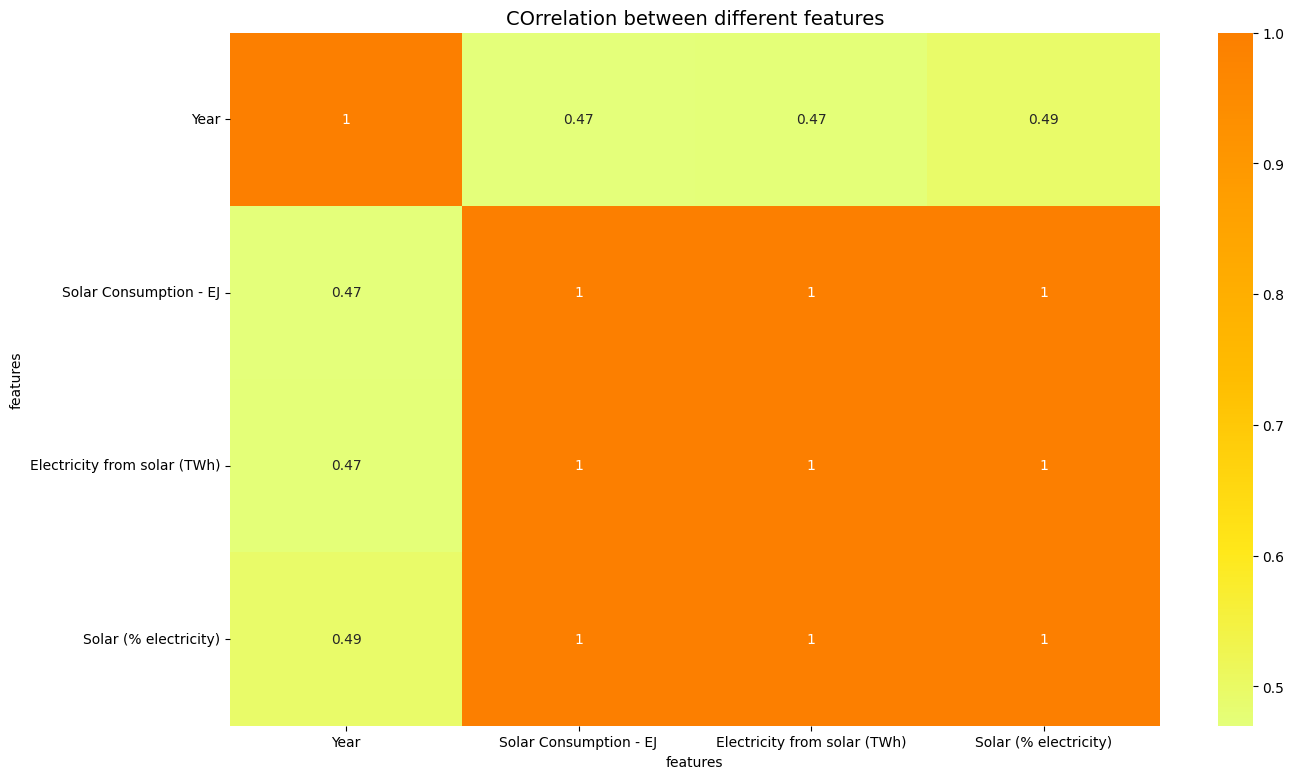

In [ ]:
#Forecasting SOlar energy consumption in India
selected_columns = ['Year', 'Solar Consumption - EJ', 'Electricity from solar (TWh)','Solar (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = data.columns.difference(selected_columns)

df5= data.drop(columns=columns_to_delete)
print(df5)

X5= df5.drop('Solar Consumption - EJ',axis=1)
y5= df5['Solar Consumption - EJ']
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df5.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X5= StandardScaler()
sc_y5 = StandardScaler()

X5 = sc_X5.fit_transform(X5)
y5= sc_y5.fit_transform(y5.values.reshape(-1, 1))


from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X5_train, y5_train.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
Y5_pred = regressor.predict(X5_test)
print(y5_test , Y5_pred)
# Calculate the R-squared score for accuracy
r2 = r2_score(y5_test, Y5_pred)
print("R-squared score:", r2)

[[-0.2934707 ]
 [-0.29360636]
 [-0.2934707 ]
 [-0.29360636]
 [-0.29360636]
 [ 0.30970583]
 [-0.29335418]
 [-0.29360636]
 [-0.28624439]
 [-0.29360636]
 [ 2.30972522]] [-0.21064576 -0.21861997 -0.2135401  -0.21324974 -0.19663782  0.40842578
 -0.20971484 -0.19716162 -0.19450297 -0.21614581  1.31199486]
R-squared score: 0.8273688681920063
